In [15]:
import pandas as pd
df=pd.read_csv(r"C:\Users\AVIDA SHETTY\Downloads\Data\Data Analytics project\dataset finnallll.csv")
df

,Food,Associativity,Region,Type,Category,Allergy,Serving,Total Weight (gms),Energy(kcal),Proteins,Carbohydrates,Fats,Fiber,Carbon Footprint(kg CO2e),Ingredients
0,Soya flour Gobi stuffed paratha,1,"North,West","Breakfast,Lunch,Dinner",Veg,soy,2 medium,393.0,235.0,16.0,24.0,7.0,8.0,0.39450,Cauliflower-15 gms; Onion-15 gms; Ginger-4 gm...
1,DUMPLINGS (Veg),0,East,"Appetizer,Snacks",Veg,soy,4 medium,255.0,115.0,4.0,22.0,1.0,4.0,0.25955,carrot-15 gms; CABBAGE-15 gms; Capsicum-15 gms...
2,Baked Vegetables,0,Continental,Appetizer,Veg,soy,4 small,83.0,17.0,0.0,1.0,1.0,0.0,0.15840,Cauliflower-20 gms; carrot-20 gms;Capsicum-20 ...
3,LETTUCE WRAP (Chicken),0,Continental,"Lunch,Dinner",Non-veg,soy,1 medium,369.0,214.0,20.0,10.0,NaN,4.0,0.69985,Lettuce Leaf-20 gms; Chicken-70 gms; Tomato-12...
4,Soya Sizzler,6,Continental,"Lunch,Dinner",Veg,soy,1 medium,567.0,305.0,28.0,21.0,10.0,9.0,0.65800,Soyabean-30 gms; Ginger-15 gms;Garlic-15 gms; ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,Lemon Water,10,"North,South,East,West",Beverages,Veg,citrus,1 glass,5.0,0.0,0.0,0.0,0.0,0.0,0.00200,Lemon-5 gms
749,Dalcheeni Water,10,"North,South,East,West",Beverages,Veg,cinnamon,1 glass,5.0,0.0,0.0,0.0,0.0,0.0,0.01750,Cinnamon-5 gms
750,Besan Cheela,1,"North,West,East",Breakfast,Veg,chickpea .,1 medium,151.0,277.0,15.0,38.0,5.0,7.0,0.20400,Onion-15 gms; Tomato-15 gms; Cumin seeds-15 g...
751,Filter Coffee Without Sugar,12,"North,South,East,West",Beverages,Veg,caffeine,2 glass,280.0,60.0,2.0,3.0,0.0,0.0,1.19500,Coffee-30 gms; Milk-250 gms


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Food                       743 non-null    object 
 1   Associativity              743 non-null    object 
 2   Region                     743 non-null    object 
 3   Type                       743 non-null    object 
 4   Category                   743 non-null    object 
 5   Allergy                    743 non-null    object 
 6   Serving                    743 non-null    object 
 7   Total Weight (gms)         743 non-null    float64
 8   Energy(kcal)               743 non-null    float64
 9   Proteins                   743 non-null    float64
 10  Carbohydrates              743 non-null    float64
 11  Fats                       743 non-null    float64
 12  Fiber                      743 non-null    float64
 13  Carbon Footprint(kg CO2e)  743 non-null    float64

In [17]:
df.isnull().sum()

Food                         10
Associativity                10
Region                       10
Type                         10
Category                     10
Allergy                      10
Serving                      10
Total Weight (gms)           10
Energy(kcal)                 10
Proteins                     10
Carbohydrates                10
Fats                         10
Fiber                        10
Carbon Footprint(kg CO2e)    10
Ingredients                   0
dtype: int64

In [18]:
# Ensure column names are clean
df.columns = df.columns.str.strip()

# Calculate max energy-to-weight ratio
max_ratio = (df['Energy(kcal)'] / df['Total Weight (gms)']).max()

# Fill missing Energy(kcal) using max ratio
df.loc[df['Energy(kcal)'].isnull(), 'Energy(kcal)'] = df['Total Weight (gms)'] * max_ratio

print(f"✅ Filled missing 'Energy(kcal)' using max energy-to-weight ratio: {max_ratio:.2f}")

✅ Filled missing 'Energy(kcal)' using max energy-to-weight ratio: inf


In [21]:

df.columns = df.columns.str.strip()

# Step 2: Rename columns for consistency (optional but recommended)
df.rename(columns={
    'Proteins': 'Protein(g)',
    'Carbohydrates': 'Carbohydrate(g)',
    'Fats': 'Fat(g)',
    'Fiber': 'Fiber(g)',
    'Carbon Footprint(kg CO2e)': 'Carbon_Footprint'
}, inplace=True)

# Step 3: Define columns to impute
nutrient_cols = ['Protein(g)', 'Carbohydrate(g)', 'Fat(g)', 'Fiber(g)', 'Carbon_Footprint']

# Step 4: Impute missing values using max ratio
for col in nutrient_cols:
    if col in df.columns:
        valid = df[col].notnull() & df['Total Weight (gms)'].notnull() & (df['Total Weight (gms)'] != 0)
        max_ratio = (df.loc[valid, col] / df.loc[valid, 'Total Weight (gms)']).max()
        
        missing = df[col].isnull() & df['Total Weight (gms)'].notnull() & (df['Total Weight (gms)'] != 0)
        df.loc[missing, col] = df.loc[missing, 'Total Weight (gms)'] * max_ratio
        
        print(f"✅ Imputed '{col}' using max ratio {max_ratio:.4f}. Remaining nulls: {df[col].isnull().sum()}")


✅ Imputed 'Protein(g)' using max ratio 1.5714. Remaining nulls: 0
✅ Imputed 'Carbohydrate(g)' using max ratio 8.8457. Remaining nulls: 0
✅ Imputed 'Fat(g)' using max ratio 0.7771. Remaining nulls: 0
✅ Imputed 'Fiber(g)' using max ratio 1.6457. Remaining nulls: 0
✅ Imputed 'Carbon_Footprint' using max ratio 0.0165. Remaining nulls: 0


In [22]:
for col in ['Food', 'Category', 'Region', 'Type', 'Associativity', 'Allergy', 'Serving']:
    df[col] = df[col].astype(str).str.strip().str.lower()

# ----- 1. Fill 'Food' based on 'Category' and 'Type'
def fill_food(row):
    if row['Food'] in ['nan', 'none']:
        if row['Category'] == 'leafy green':
            return 'spinach'
        elif row['Category'] == 'tropical fruit':
            return 'banana'
        elif row['Type'] == 'animal-based':
            return 'chicken'
    return row['Food']
df['Food'] = df.apply(fill_food, axis=1)


In [23]:
print(df['Food'].isnull().sum())

0


In [24]:
# ----- 2. Fill 'Associativity' based on 'Type'
def fill_associativity(row):
    if row['Associativity'] in ['nan', 'none']:
        if row['Type'] == 'plant-based':
            return 'vegetarian'
        elif row['Type'] == 'animal-based':
            return 'non-vegetarian'
    return row['Associativity']
df['Associativity'] = df.apply(fill_associativity, axis=1)


In [25]:
print(df['Associativity'].isnull().sum())

0


In [26]:
# ----- 3. Fill 'Region' based on 'Food' and 'Category'
def fill_region(row):
    if row['Region'] in ['nan', 'none']:
        if row['Food'] in ['coconut', 'cashew', 'banana']:
            return 'tropical'
        elif row['Category'] in ['leafy green', 'root vegetable']:
            return 'temperate'
        elif row['Food'] in ['wheat', 'rice', 'millet']:
            return 'plains'
    return row['Region']
df['Region'] = df.apply(fill_region, axis=1)



In [27]:
print(df['Region'].isnull().sum())

0


In [28]:
# ----- 4. Fill 'Type' based on 'Category'
def fill_type(row):
    if row['Type'] in ['nan', 'none']:
        if row['Category'] in ['meat', 'dairy']:
            return 'animal-based'
        elif row['Category'] in ['leafy green', 'fruit', 'cereal']:
            return 'plant-based'
    return row['Type']
df['Type'] = df.apply(fill_type, axis=1)


In [29]:
print(df['Type'].isnull().sum())


0


In [30]:
# ----- 5. Fill 'Category' based on 'Food'
def fill_category(row):
    if row['Category'] in ['nan', 'none']:
        if row['Food'] in ['spinach', 'kale']:
            return 'leafy green'
        elif row['Food'] in ['papaya', 'banana']:
            return 'tropical fruit'
        elif row['Food'] in ['wheat', 'rice']:
            return 'cereal'
    return row['Category']
df['Category'] = df.apply(fill_category, axis=1)


In [31]:
print(df['Category'].isnull().sum())

0


In [32]:
# ----- 6. Fill 'Allergy' based on 'Food'
def fill_allergy(row):
    if row['Allergy'] in ['nan', 'none']:
        if row['Food'] in ['peanut', 'cashew']:
            return 'nut allergy'
        elif row['Food'] in ['milk', 'cheese']:
            return 'lactose intolerance'
        elif row['Food'] in ['shrimp']:
            return 'shellfish allergy'
    return row['Allergy']
df['Allergy'] = df.apply(fill_allergy, axis=1)



In [33]:
print(df['Allergy'].isnull().sum())

0


In [34]:
# ----- 7. Fill 'Serving' based on 'Food' or 'Type'
def fill_serving(row):
    if row['Serving'] in ['nan', 'none']:
        if row['Type'] == 'plant-based':
            return '100g'
        elif row['Food'] in ['milk']:
            return '250ml'
        elif row['Food'] in ['rice']:
            return '1 bowl'
    return row['Serving']
df['Serving'] = df.apply(fill_serving, axis=1)


In [35]:
print(df['Serving'].isnull().sum())

0


In [36]:
df.isnull().sum()

Food                   0
Associativity          0
Region                 0
Type                   0
Category               0
Allergy                0
Serving                0
Total Weight (gms)    10
Energy(kcal)           0
Protein(g)             0
Carbohydrate(g)        0
Fat(g)                 0
Fiber(g)               0
Carbon_Footprint       0
Ingredients            0
dtype: int64

In [37]:
df.columns = df.columns.str.strip()
df['Total Weight (gms)'] = df.groupby('Type')['Total Weight (gms)'].transform(
    lambda x: x.fillna(x.median())
)

In [38]:
print(df['Type'].isnull().sum())

0


In [44]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
print(df.columns.tolist())

['Food', 'Associativity', 'Region', 'Type', 'Category', 'Allergy', 'Serving', 'Total_Weight_gms', 'Energykcal', 'Proteing', 'Carbohydrateg', 'Fatg', 'Fiberg', 'Carbon_Footprint', 'Ingredients']


In [45]:
print('Carbon_Footprint' in df.columns)

True


In [47]:
df['Nutrient_Score'] = (
    df['Proteing'] * 0.4 +
    df['Fiberg'] * 0.3 +
    df['Energykcal'] * 0.3
)

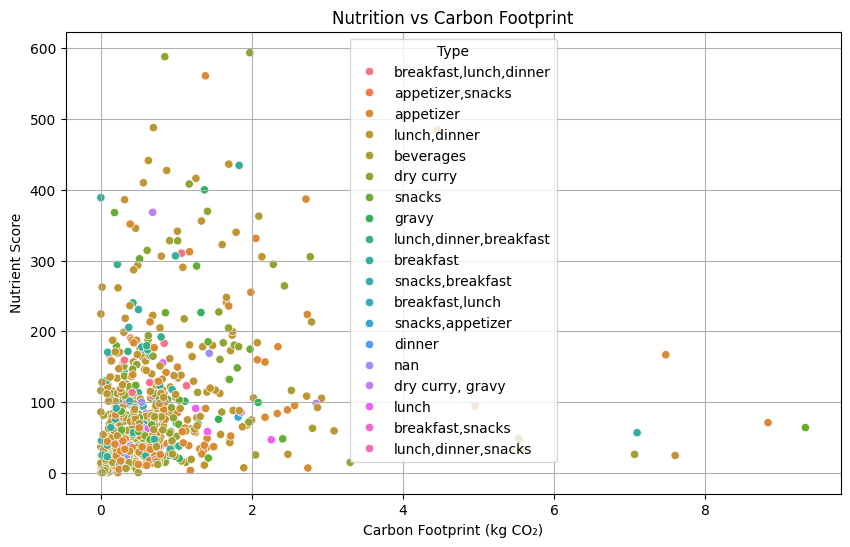

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Carbon_Footprint', y='Nutrient_Score', hue='Type')
plt.title('Nutrition vs Carbon Footprint')
plt.xlabel('Carbon Footprint (kg CO₂)')
plt.ylabel('Nutrient Score')
plt.grid(True)
plt.show()

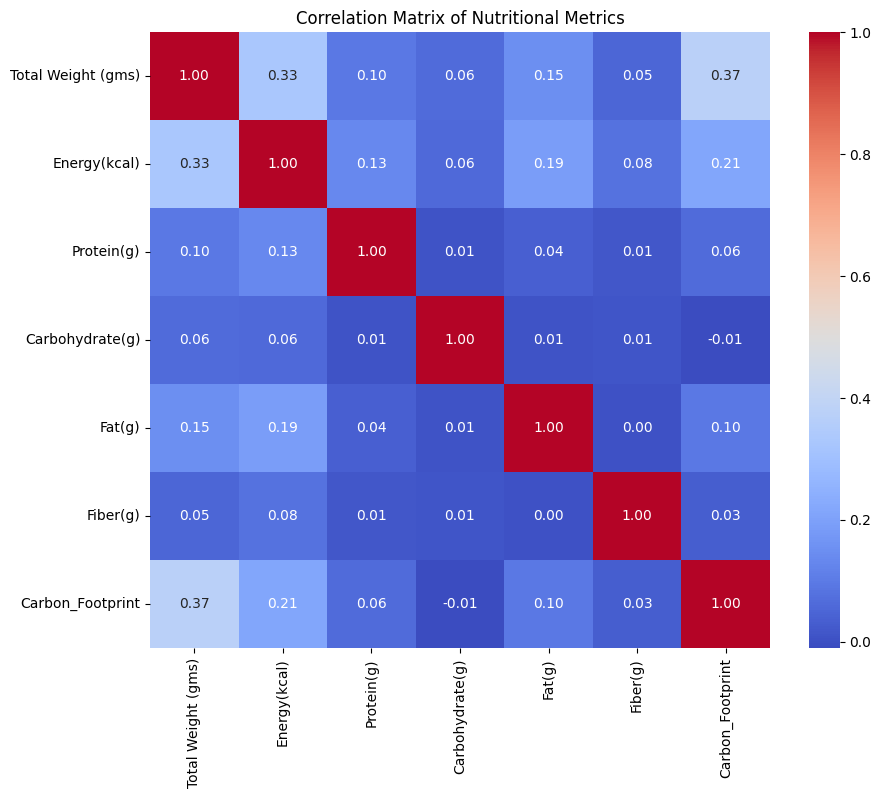

In [ ]:
# Correlation matrix for numeric columns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Nutritional Metrics')
plt.show()

In [73]:
df.columns = df.columns.str.strip() \
                       .str.replace(' ', '_') \
                       .str.replace('(', '') \
                       .str.replace(')', '')

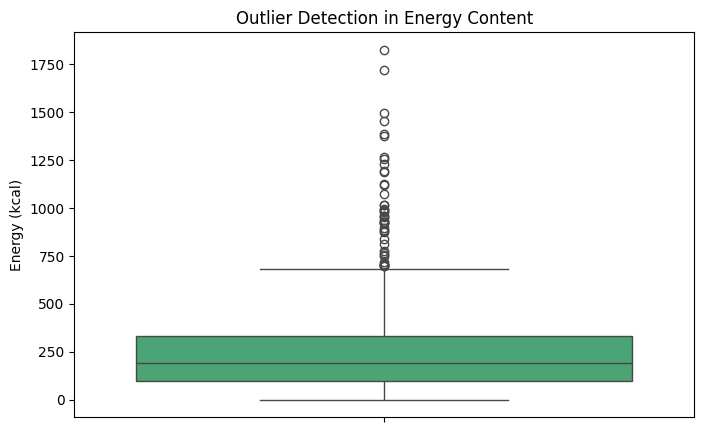

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, y='Energykcal', color='mediumseagreen')
plt.title('Outlier Detection in Energy Content')
plt.ylabel('Energy (kcal)')
plt.show()

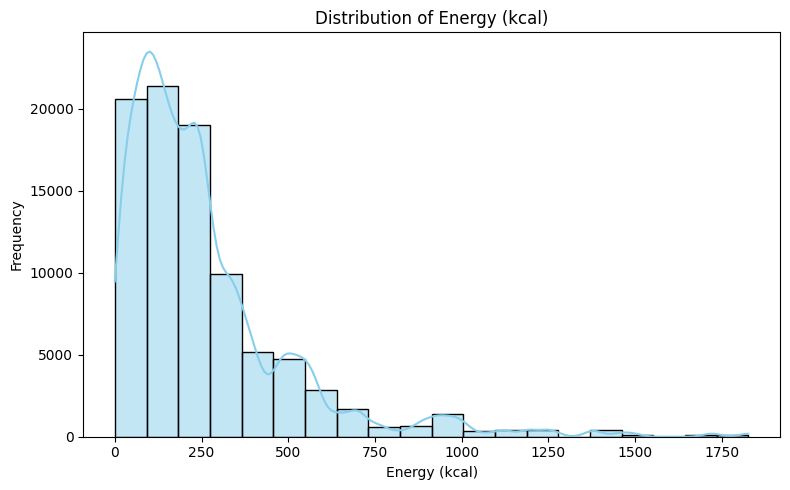

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
sns.histplot(df['Energy(kcal)'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Energy (kcal)')
plt.xlabel('Energy (kcal)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [51]:
df.to_csv('cleaned_nutritionfood_dataFinal.csv',index=False)